# Scrape Flipkart Reviews & Ratings  + Star Rating Prediction of Flipkart Product Review

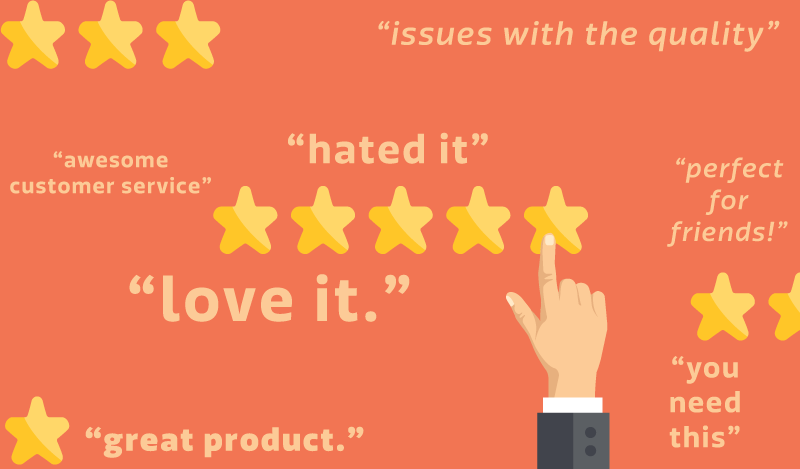

In [98]:
from IPython.display import Image
Image("/content/Fake_reviews.png")

## Introduction

Flipkart is the biggest E-Commerce site based in India. Flipkart is recently gathered by Walmart, is known as one of the biggest retail companies all over the world. Web Scraper Flipkart is done while using Python.

Web Scraper Flipkart Extractor helps to get data from one page. By this, you can make a list of websites and you can gather all the data from pages, and willbe able to do the implementation.

# Web Flipkart Scraping Code

## Loading Libraries

In [13]:
import requests 
from tqdm import tqdm
import re
import os
import sys
import json
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
from bs4 import BeautifulSoup
import unicodedata
from textblob import TextBlob
import en_core_web_sm

## Extract the data from HTML tags

In [3]:
dataset = []

# iterating over 50 pages of reviews
for i in tqdm(range(1,50)):

    URL = f"https://www.flipkart.com/realme-c20-cool-grey-32-gb/product-reviews/itm14d0416b87d55?pid=ACCEJZXYKSG2T9GS&lid=LSTACCEJZXYKSG2T9GSVY4ZIC&marketplace=FLIPKART&page={i}"
    r = requests.get(URL)    
    soup = BeautifulSoup(r.content, 'html.parser') 

    cols = soup.find_all('div',attrs={'class':'col _2wzgFH K0kLPL'})

    for col in cols:
        row = col.find_all('div',attrs={'class':'row'})

        rating = row[0].find('div').text
        review = row[1].find('div').text

        dataset.append({'review': review , 'rating' : rating})
len(dataset)

100%|██████████| 49/49 [01:35<00:00,  1.96s/it]


490

In [4]:
dataset1 = []

# iterating over 50 pages of reviews
for i in tqdm(range(1,50)):

    URL = f"https://www.flipkart.com/realme-c21-cross-blue-64-gb/product-reviews/itm14d0416b87d55?pid=ACCEJZXYKSG2T9GS&lid=LSTACCEJZXYKSG2T9GSVY4ZIC&marketplace=FLIPKART&page={i}"
    r = requests.get(URL)    
    soup = BeautifulSoup(r.content, 'html.parser') 

    cols = soup.find_all('div',attrs={'class':'col _2wzgFH K0kLPL'})

    for col in cols:
        row = col.find_all('div',attrs={'class':'row'})

        rating = row[0].find('div').text
        review = row[1].find('div').text

        dataset1.append({'review': review , 'rating' : rating})
len(dataset1)

100%|██████████| 49/49 [01:31<00:00,  1.87s/it]


490

In [5]:
dataset2 = []

# iterating over 50 pages of reviews
for i in tqdm(range(1,50)):

    URL = f"https://www.flipkart.com/samsung-galaxy-m42-prism-dot-gray-128-gb/product-reviews/itm14d0416b87d55?pid=ACCEJZXYKSG2T9GS&lid=LSTACCEJZXYKSG2T9GSVY4ZIC&marketplace=FLIPKART&page={i}"
    r = requests.get(URL)    
    soup = BeautifulSoup(r.content, 'html.parser') 

    cols = soup.find_all('div',attrs={'class':'col _2wzgFH K0kLPL'})

    for col in cols:
        row = col.find_all('div',attrs={'class':'row'})

        rating = row[0].find('div').text
        review = row[1].find('div').text

        dataset2.append({'review': review , 'rating' : rating})
len(dataset2)

100%|██████████| 49/49 [01:34<00:00,  1.93s/it]


490

#### After collection of data fields created dictionary with name of the data fileds as keys and list of data fileds are values 

In [6]:
d1_df = pd.DataFrame(dataset)
d2_df = pd.DataFrame(dataset1)
d3_df = pd.DataFrame(dataset2)

final_df = pd.concat([d1_df, d2_df, d3_df], axis=0).reset_index(drop=True)


In [7]:
final_df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,This product sound is clear and excellent bass...,4


In [8]:
final_df.shape

(1470, 2)

In [9]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1470 non-null   object
 1   rating  1470 non-null   object
dtypes: object(2)
memory usage: 23.1+ KB


In [10]:
final_df.rating=final_df.rating.astype(int)

In [11]:
final_df.rating.value_counts()

5    838
4    431
3    129
1     54
2     18
Name: rating, dtype: int64

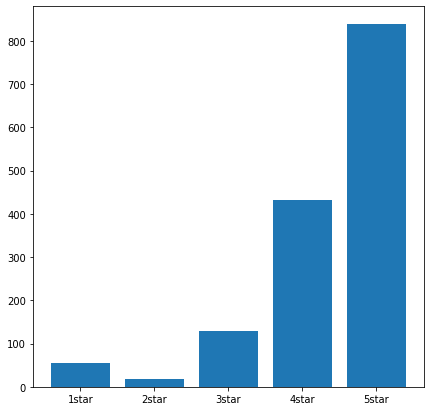

In [14]:
## plotting bar graph for 
plt.figure(figsize = (7,7))
ratings = ['1star','2star','3star', '4star', '5star']
numRatings = [len(final_df[final_df['rating'] == 1 ]),
             len(final_df[final_df['rating'] == 2 ]),
             len(final_df[final_df['rating'] == 3 ]),
             len(final_df[final_df['rating'] == 4 ]),
             len(final_df[final_df['rating'] == 5 ])
             ]
plt.bar(ratings, numRatings)
plt.show()

Text(0, 0.5, 'Count')

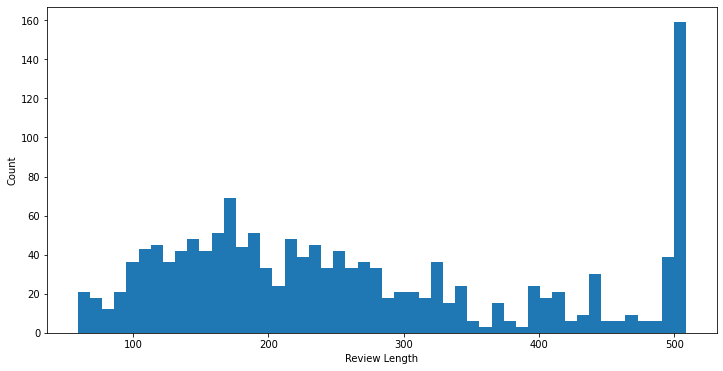

In [15]:

# Create and print a Reviews length distribution graph.
review_length_distribution_plt = pd.DataFrame(final_df ["review"].str.len())
review_length_distribution_plt = review_length_distribution_plt[review_length_distribution_plt.review < 5000]
review_length_distribution_plt.groupby(["review"])
review_length_distribution_plt = review_length_distribution_plt.plot(kind='hist', 
                                                                     legend=None, 
                                                                     bins=50, 
                                                                     figsize=(12, 6))
review_length_distribution_plt.set_xlabel("Review Length")
review_length_distribution_plt.set_ylabel("Count")

## Clean the data, dropping the stop words and pass through lemmatization

In [17]:
nlp = en_core_web_sm.load()

In [18]:
def get_wordcounts(x):
	length = len(str(x).split())
	return length

In [19]:
def get_charcounts(x):
	s = x.split()
	x = ''.join(s)
	return len(x)

In [20]:
def get_avg_wordlength(x):
	count = get_charcounts(x)/get_wordcounts(x)
	return count

In [21]:
def get_stopwords_counts(x):
	l = len([t for t in x.split() if t in stopwords])
	return l

In [22]:
def get_hashtag_counts(x):
	l = len([t for t in x.split() if t.startswith('#')])
	return l

In [23]:
def get_mentions_counts(x):
	l = len([t for t in x.split() if t.startswith('@')])
	return l

In [24]:

def get_digit_counts(x):
	digits = re.findall(r'[0-9,.]+', x)
	return len(digits)

In [25]:
def get_digit_counts(x):
	digits = re.findall(r'[0-9,.]+', x)
	return len(digits)

In [26]:
def get_uppercase_counts(x):
	return len([t for t in x.split() if t.isupper()])

In [27]:
def get_emails(x):
	emails = re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', x)
	counts = len(emails)

	return counts, emails

In [28]:
def remove_emails(x):
	return re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)

In [29]:
def get_urls(x):
	urls = re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)
	counts = len(urls)

	return counts, urls

In [30]:
def remove_urls(x):
	return re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)

In [31]:
def remove_rt(x):
	return re.sub(r'\brt\b', '', x).strip()

In [32]:
def remove_special_chars(x):
	x = re.sub(r'[^\w ]+', "", x)
	x = ' '.join(x.split())
	return x

In [33]:
def remove_html_tags(x):
	return BeautifulSoup(x, 'lxml').get_text().strip()

In [34]:
def remove_accented_chars(x):
	x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
	return x

In [35]:
def remove_stopwords(x):
	return ' '.join([t for t in x.split() if t not in stopwords])	

In [36]:
def make_base(x):
	x = str(x)
	x_list = []
	doc = nlp(x)
	
	for token in doc:
		lemma = token.lemma_
		if lemma == '-PRON-' or lemma == 'be':
			lemma = token.text

		x_list.append(lemma)
	return ' '.join(x_list)

In [37]:
def get_value_counts(df, col):
	text = ' '.join(df[col])
	text = text.split()
	freq = pd.Series(text).value_counts()
	return freq

In [38]:
def remove_common_words(x, freq, n=20):
	fn = freq[:n]
	x = ' '.join([t for t in x.split() if t not in fn])
	return x

In [39]:
def remove_rarewords(x, freq, n=20):
	fn = freq.tail(n)
	x = ' '.join([t for t in x.split() if t not in fn])
	return x

In [40]:
def remove_dups_char(x):
	x = re.sub("(.)\\1{2,}", "\\1", x)
	return x

In [41]:
def spelling_correction(x):
	x = TextBlob(x).correct()
	return x

In [42]:
def get_basic_features(df):
	if type(df) == pd.core.frame.DataFrame:
		df['char_counts'] = df['text'].apply(lambda x:get_charcounts(x))
		df['word_counts'] = df['text'].apply(lambda x:get_wordcounts(x))
		df['avg_wordlength'] = df['text'].apply(lambda x:get_avg_wordlength(x))
		df['stopwords_counts'] = df['text'].apply(lambda x:get_stopwords_counts(x))
		df['hashtag_counts'] = df['text'].apply(lambda x:get_hashtag_counts(x))
		df['mentions_counts'] = df['text'].apply(lambda x:get_mentions_counts(x))
		df['digits_counts'] = df['text'].apply(lambda x:get_digit_counts(x))
		df['uppercase_counts'] = df['text'].apply(lambda x:get_uppercase_counts(x))
	else:
		print('ERROR: This function takes only Pandas DataFrame')

In [43]:
final_df["text"]=final_df["review"]

In [44]:
get_basic_features(final_df)

In [45]:
final_df.head()

,review,rating,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,It was nice produt. I like it's design a lot. ...,5,It was nice produt. I like it's design a lot. ...,78,18,4.333333,3,0,0,5,2
1,awesome sound....very pretty to see this nd th...,5,awesome sound....very pretty to see this nd th...,111,24,4.625000,10,0,0,1,3
2,awesome sound quality. pros 7-8 hrs of battery...,4,awesome sound quality. pros 7-8 hrs of battery...,420,80,5.250000,29,0,0,17,1
3,I think it is such a good product not only as ...,5,I think it is such a good product not only as ...,325,81,4.012346,46,0,0,4,3
4,This product sound is clear and excellent bass...,4,This product sound is clear and excellent bass...,137,29,4.724138,13,0,0,3,1


In [65]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = remove_emails(x)
    x = remove_urls(x)
    x = remove_html_tags(x)
    x = remove_rt(x)
    x = remove_accented_chars(x)
    x = remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    x = make_base(x)
    x = remove_stopwords(x)
    make_base
        
    return x

In [66]:
final_df["clean_text"]=final_df["text"].apply(lambda x:get_clean(x))

In [67]:
clean_df=final_df[["review","rating","clean_text"]]

In [68]:
clean_df

,review,rating,clean_text
0,It was nice produt. I like it's design a lot. ...,5,nice produt like design lot easy carry look st...
1,awesome sound....very pretty to see this nd th...,5,awesome soundvery pretty nd sound quality good...
2,awesome sound quality. pros 7-8 hrs of battery...,4,awesome sound quality pro 78 hrs battery life ...
3,I think it is such a good product not only as ...,5,think good product quality design good m use p...
4,This product sound is clear and excellent bass...,4,product sound clear excellent bass obviously g...
...,...,...,...
1465,just love itsuperb bass and sound quality is t...,5,love itsuperb bass sound quality good build qu...
1466,super sound quality..one of the best headphone...,5,super sound qualityone good headphone superior...
1467,Tremendous product. very good experience with ...,4,tremendous product good experience boat rocker...
1468,"Awesome product in every Angel,such as battery...",5,awesome product angelsuch battery backup 10 ho...


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import LinearSVC

## training the vectorizer 

In [73]:
# training the vectorizer 
vectorizer = TfidfVectorizer(max_features=20000,ngram_range=(1,3),analyzer='char')
X = vectorizer.fit_transform(clean_df["clean_text"])

In [76]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X,clean_df["rating"], test_size = 0.2, random_state = 1)


## Building Classifier

In [84]:
clf=LinearSVC(class_weight='balanced')
clf.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [85]:
y_pred=clf.predict(X_test)

In [86]:
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}%".format(round((accuracy_score(y_test,y_pred)*100),2)))
print(classification_report(y_test,y_pred))

[[ 11   0   0   0   0]
 [  0   3   0   0   0]
 [  0   0  25   0   0]
 [  0   0   0  82   3]
 [  0   0   2   3 165]]
Accuracy Score 97.28%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         3
           3       0.93      1.00      0.96        25
           4       0.96      0.96      0.96        85
           5       0.98      0.97      0.98       170

    accuracy                           0.97       294
   macro avg       0.97      0.99      0.98       294
weighted avg       0.97      0.97      0.97       294



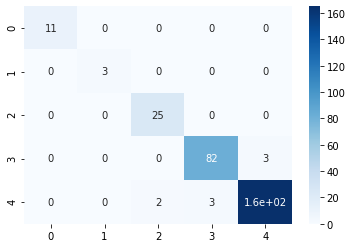

In [87]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues')

## Test Against New Messages

In [94]:
def pred(msg):
  msg=get_clean(msg)
  vec=vectorizer.transform([msg])
  prediction = clf.predict(vec)
  return print(prediction)

In [97]:
pred("this mobile is rellay good, i like")

[5]
